#PyCaret for Regression

https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb





##Importa as bibliotecas que serão utilizadas

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from scipy import stats
from pandas_profiling import ProfileReport

from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor




##Abre o arquivo contendo os dados do imóvel avaliando

In [18]:
path='/content/casa.xlsx'
tipo=path[9:13]

x_imovel = pd.read_excel(path,sheet_name='Sheet1')
x_imovel


NI           End Complemento  ... Regional  Fração                Empresa
0  Itaitinga  Rua A SDO 34   Itaitinga  ...        1       0  LBS ENGENHARIA EIRELI

[1 rows x 31 columns]

##Abre o banco de dados de Imóveis, neste caso de casas. 

In [19]:
df=pd.read_excel('/content/Casa_Jun16_Nov20.xlsx',sheet_name='Sheet1')
df_copy = df.copy()
df.head()

NI  ...                                   Empresa
0  2020060812322020051000  ...                     LBS ENGENHARIA EIRELI
1  2020060812322020050902  ...    DANILO ROOSEVELT PERDIGAO COIMBRA LTDA
2  2020060812322020050872  ...    DANILO ROOSEVELT PERDIGAO COIMBRA LTDA
3  2020060812322020050717  ...        I M CONSULTORIA E CONSTRUCOES LTDA
4  2020030909282020020738  ...  ANLEGG - PROJETOS E EMPREENDIMENTOS LTDA

[5 rows x 31 columns]

##Informe o município onde se localiza o imóvel avaliando e filtra o dataframe para conter apenas dados deste município

In [20]:
municipio = "ITAITINGA"
df=df[(df.Municipio == municipio)]
df

NI  ...                                   Empresa
689    2020060812322020050834  ...  ANLEGG - PROJETOS E EMPREENDIMENTOS LTDA
690    2020030909282020020739  ...  ANLEGG - PROJETOS E EMPREENDIMENTOS LTDA
693    2020051211282020030742  ...           NAGASSE COIMBRA ENGENHARIA LTDA
695    2020030418112020010864  ...      PARTENON CONSTRUCOES E SERVICOS LTDA
698    2020060812322020051212  ...      PARTENON CONSTRUCOES E SERVICOS LTDA
...                       ...  ...                                       ...
21118  2020111015212020100044  ...                       ITA ENGENHARIA LTDA
21129  2020111015212020100016  ...                      FP BONFIM ENGENHARIA
21130  2020111015212020100010  ...                      FP BONFIM ENGENHARIA
21133  2020111015212020100007  ...                      FP BONFIM ENGENHARIA
21134  2020111015212020100006  ...                      FP BONFIM ENGENHARIA

[3837 rows x 31 columns]

##Exclui os atributo que não serão utilizados pelo modelo

In [21]:
if tipo == "casa":
  df=df.drop(["NI","End","Bairro","Complemento","Informante","Telefone","Terreno","Faixa-Idade","Empresa","Fração","Municipio","Regional",
              "Valor-Total","Piscina",	"Piscina-Priv","Portaria",	"Esporte","Home-Club"],axis=1)
  x_imovel = x_imovel.drop(["NI","End","Bairro","Complemento","Informante","Telefone","Terreno","Faixa-Idade","Empresa","Fração","Municipio","Regional",
              "Valor-Total","Piscina",	"Piscina-Priv","Portaria",	"Esporte","Home-Club","Valor-Unit"],axis=1)
else:
  df=df.drop(['NI', 'End', 'Complemento', 'Bairro', 'Informante', 'Telefone','Faixa-Idade', 'Cons-Unid','Pad-Unid','Valor-Total', 'Municipio', 'Empresa'],axis=1)
  x_imovel = x_imovel.drop(['NI', 'End', 'Complemento', 'Bairro', 'Informante', 'Telefone','Faixa-Idade', 
       'Cons-Unid','Pad-Unid','Valor-Total', 'Municipio', 'Empresa',"Valor-Unit"],axis=1)
df.head()

Lat       Long   Area  Ofer-Trans  ...  WCS    Renda  Vagas  Valor-Unit
689 -3.883211 -38.526686  97.34           1  ...    2  1070.31      2     1643.72
690 -3.884833 -38.527476  96.27           1  ...    2   616.98      2     1661.99
693 -3.889294 -38.531500  95.33           2  ...    2   616.98      1     1678.38
695 -3.891722 -38.518083  94.54           2  ...    2   616.98      2     1692.41
698 -3.885028 -38.527195  96.48           2  ...    2   616.98      2     1762.02

[5 rows x 13 columns]

##Converte casas decimais com vírgula para ponto de alguns atributos

In [22]:
df['Lat']=df['Lat'].astype(str)
df['Lat']=df['Lat'].str.replace(',','.')
df['Lat']=df['Lat'].astype(float)

df['Long']=df['Long'].astype(str)
df['Long']=df['Long'].str.replace(',','.')
df['Long']=df['Long'].astype(float)

##Localiza e elimina valores nulos

In [23]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Lat           0
Long          0
Area          0
Ofer-Trans    0
Idade         0
Data          0
Cons          0
Pad           0
Quartos       0
WCS           0
Renda         0
Vagas         0
Valor-Unit    0
dtype: int64

In [24]:
!pip install pycaret

     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [25]:
from pycaret.utils import enable_colab
enable_colab()
import pandas as pd

Colab mode enabled.


In [26]:
dataset = df
dataset.head()

Lat       Long   Area  Ofer-Trans  ...  WCS    Renda  Vagas  Valor-Unit
689 -3.883211 -38.526686  97.34           1  ...    2  1070.31      2     1643.72
690 -3.884833 -38.527476  96.27           1  ...    2   616.98      2     1661.99
693 -3.889294 -38.531500  95.33           2  ...    2   616.98      1     1678.38
695 -3.891722 -38.518083  94.54           2  ...    2   616.98      2     1692.41
698 -3.885028 -38.527195  96.48           2  ...    2   616.98      2     1762.02

[5 rows x 13 columns]

In [35]:

dataset['Idade']=dataset['Idade'].apply(lambda x: float(x))
dataset['Data']=dataset['Data'].apply(lambda x: float(x))
dataset['Quartos']=dataset['Quartos'].apply(lambda x: float(x))
dataset['WCS']=dataset['WCS'].apply(lambda x: float(x))
dataset['Vagas']=dataset['Vagas'].apply(lambda x: float(x))
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 689 to 21134
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lat         3837 non-null   float64
 1   Long        3837 non-null   float64
 2   Area        3837 non-null   float64
 3   Ofer-Trans  3837 non-null   int64  
 4   Idade       3837 non-null   float64
 5   Data        3837 non-null   float64
 6   Cons        3837 non-null   int64  
 7   Pad         3837 non-null   int64  
 8   Quartos     3837 non-null   float64
 9   WCS         3837 non-null   float64
 10  Renda       3837 non-null   float64
 11  Vagas       3837 non-null   float64
 12  Valor-Unit  3837 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 579.7 KB


##Separando dados não vistos para predições futuras

In [36]:

data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3453, 13)
Unseen Data For Predictions: (384, 13)


## Setting up Environment in PyCaret

In [37]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Valor-Unit', session_id=123)

Description             Value
0                               session_id               123
1                                   Target        Valor-Unit
2                            Original Data        (3453, 13)
3                           Missing Values             False
4                         Numeric Features                 9
5                     Categorical Features                 3
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (2417, 19)
10                    Transformed Test Set        (1036, 19)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              b0be
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42                              Clustering             False
43                    Clustering Iteration              None
44                     Polynomial Features             False
45                       Polynomial Degree              None
46                    Trignometry Features             False
47                    Polynomial Threshold              None
48                          Group Features             False
49                       Feature Selection             False
50                Feature Selection Method           classic
51            Features Selection Threshold              None
52                     Feature Interaction             False
53                           Feature Ratio             False
54                   Interaction Threshold              None
55                        Transform Target             False
56                 Transform Target Method           box-cox

##Comparing All Models

In [39]:
best = compare_models(exclude = ['ransac'])

Model           MAE           MSE  \
huber                     Huber Regressor  1.023455e+02  2.639289e+05   
en                            Elastic Net  1.069946e+02  2.653632e+05   
lasso                    Lasso Regression  1.066776e+02  2.646593e+05   
br                         Bayesian Ridge  1.085533e+02  2.656294e+05   
llar         Lasso Least Angle Regression  1.258113e+02  2.702338e+05   
omp           Orthogonal Matching Pursuit  1.184478e+02  2.693424e+05   
lr                      Linear Regression  1.013510e+02  2.654308e+05   
ridge                    Ridge Regression  1.032134e+02  2.699963e+05   
par          Passive Aggressive Regressor  2.113564e+02  3.095055e+05   
lightgbm  Light Gradient Boosting Machine  1.060924e+02  2.561131e+05   
gbr           Gradient Boosting Regressor  1.036656e+02  2.677873e+05   
rf                Random Forest Regressor  9.171050e+01  2.702813e+05   
dt                Decision Tree Regressor  1.049426e+02  2.792689e+05   
et                  Extra Trees Regressor  9.178400e+01  2.781891e+05   
knn                 K Neighbors Regressor  1.143950e+02  3.035096e+05   
ada                    AdaBoost Regressor  1.232057e+02  2.662621e+05   
lar                Least Angle Regression  1.075837e+08  1.251810e+18   

                  RMSE            R2   RMSLE        MAPE  TT (Sec)  
huber     3.412753e+02  1.603000e-01  0.0969      0.0504     0.075  
en        3.444898e+02  1.303000e-01  0.0927      0.0533     0.015  
lasso     3.440502e+02  1.236000e-01  0.0915      0.0530     0.016  
br        3.463683e+02  1.111000e-01  0.0938      0.0542     0.018  
llar      3.551185e+02  6.700000e-02  0.1075      0.0641     0.014  
omp       3.532301e+02  5.830000e-02  0.1005      0.0598     0.013  
lr        3.476002e+02  4.560000e-02  0.0905      0.0499     0.014  
ridge     3.566291e+02 -1.081000e-01  0.0886      0.0510     0.015  
par       4.238483e+02 -9.225000e-01  0.1500      0.1074     0.017  
lightgbm  4.055313e+02 -1.980300e+00  0.1017      0.0526     0.088  
gbr       4.100461e+02 -3.177000e+00  0.0966      0.0515     0.266  
rf        4.129598e+02 -3.812300e+00  0.0926      0.0451     1.071  
dt        4.356490e+02 -4.018900e+00  0.1063      0.0525     0.026  
et        4.173821e+02 -4.100000e+00  0.0957      0.0452     0.755  
knn       4.473434e+02 -5.057400e+00  0.1080      0.0578     0.064  
ada       4.296102e+02 -6.789400e+00  0.1061      0.0646     0.031  
lar       3.538106e+08 -2.115167e+13  1.3669  60443.6411     0.017

##Create a Model

###AdaBoost Regressor

In [40]:
ada = create_model('ada')

MAE          MSE      RMSE       R2   RMSLE    MAPE
0     172.1942  770279.8655  877.6559 -33.6376  0.1785  0.0936
1     139.7551  535990.1344  732.1135   0.5675  0.0922  0.0560
2     139.5996  589490.1225  767.7826 -22.0521  0.1453  0.0758
3     100.9918   18026.4749  134.2627   0.2954  0.0785  0.0588
4     108.1023   23092.1058  151.9609   0.2070  0.0796  0.0588
5     117.4207   60323.7540  245.6089  -0.0193  0.1061  0.0611
6     112.0276  206459.7021  454.3784   0.8329  0.0698  0.0476
7     141.5579  418140.1094  646.6375 -14.6607  0.1428  0.0778
8     100.1904   20899.7224  144.5674   0.2530  0.0831  0.0577
9     100.2173   19918.8434  141.1341   0.3195  0.0853  0.0592
Mean  123.2057  266262.0834  429.6102  -6.7894  0.1061  0.0646
SD     22.8418  272388.9869  285.8272  11.7178  0.0347  0.0129

In [41]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


###Light Gradient Boosting Machine

In [42]:
lightgbm = create_model('lightgbm')

MAE          MSE      RMSE       R2   RMSLE    MAPE
0     137.6560  289164.5594  537.7402 -12.0030  0.1475  0.0747
1     134.9875  922513.3916  960.4756   0.2556  0.1157  0.0454
2     109.7349  149051.8456  386.0723  -4.8287  0.1219  0.0598
3      95.5792   29886.3565  172.8767  -0.1681  0.0861  0.0545
4      81.6796   15249.2797  123.4880   0.4764  0.0656  0.0450
5     106.2927  100007.0388  316.2389  -0.6898  0.1151  0.0538
6     127.9569  889431.5347  943.0968   0.2802  0.1070  0.0407
7     109.9381  134350.1566  366.5381  -4.0318  0.1142  0.0605
8      72.1737   11690.5813  108.1230   0.5821  0.0626  0.0411
9      84.9250   19786.3347  140.6639   0.3241  0.0808  0.0504
Mean  106.0924  256113.1079  405.5313  -1.9803  0.1017  0.0526
SD     21.5462  334920.5941  302.7498   3.8177  0.0256  0.0100

###Decision Tree

In [43]:
dt = create_model('dt')

MAE          MSE      RMSE       R2   RMSLE    MAPE
0     141.9765  617243.5388  785.6485 -26.7559  0.1688  0.0768
1     138.8616  793258.5917  890.6507   0.3599  0.1116  0.0492
2     105.6299  210287.8708  458.5716  -7.2233  0.1236  0.0585
3      91.8250   58482.8482  241.8323  -1.2858  0.1010  0.0522
4      74.6402   15572.6365  124.7904   0.4652  0.0711  0.0419
5     100.6288   64735.7315  254.4322  -0.0938  0.1057  0.0517
6     137.6354  790286.1602  888.9804   0.3605  0.1107  0.0483
7     103.5794  211008.3789  459.3565  -6.9029  0.1203  0.0566
8      75.2874   16277.6125  127.5837   0.4182  0.0723  0.0428
9      79.3619   15535.9996  124.6435   0.4693  0.0776  0.0473
Mean  104.9426  279268.9369  435.6490  -4.0189  0.1063  0.0525
SD     24.9717  308544.1494  299.1303   8.1039  0.0277  0.0095

##Tune a Model

###AdaBoost Regressor

In [44]:
tuned_ada = tune_model(ada)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0      88.5222  1.896374e+04   137.7089  0.1472  0.0725  0.0493
1     158.9655  1.196862e+06  1094.0117  0.0342  0.1589  0.0545
2      89.7335  1.907425e+04   138.1096  0.2541  0.0722  0.0495
3      95.6961  1.684088e+04   129.7724  0.3418  0.0759  0.0555
4      97.7786  2.010437e+04   141.7899  0.3096  0.0737  0.0531
5      98.7977  5.340819e+04   231.1021  0.0976  0.0941  0.0512
6     149.2333  1.200189e+06  1095.5312  0.0288  0.1558  0.0472
7      95.5771  2.213984e+04   148.7946  0.1708  0.0796  0.0532
8      91.9628  1.811707e+04   134.5997  0.3524  0.0774  0.0528
9      92.0868  1.821509e+04   134.9633  0.3777  0.0828  0.0549
Mean  105.8354  2.583914e+05   338.6383  0.2114  0.0943  0.0521
SD     24.4319  4.701791e+05   379.0982  0.1263  0.0321  0.0026

In [ ]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


###Light Gradient Boosting Machine

In [45]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }


tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

MAE          MSE      RMSE       R2   RMSLE    MAPE
0     134.3908  290320.1265  538.8136 -12.0550  0.1460  0.0730
1     132.5840  922027.8077  960.2228   0.2560  0.1144  0.0439
2     107.1133  152012.2418  389.8875  -4.9445  0.1213  0.0583
3      86.1163   25902.0774  160.9412  -0.0124  0.0814  0.0490
4      78.8343   15479.3602  124.4161   0.4685  0.0664  0.0435
5     105.7984   98356.5932  313.6185  -0.6619  0.1152  0.0534
6     129.0844  889048.0610  942.8935   0.2806  0.1074  0.0414
7     102.4693  135976.6591  368.7501  -4.0928  0.1123  0.0564
8      74.2133   13303.8236  115.3422   0.5245  0.0677  0.0426
9      76.4072   14987.7990  122.4247   0.4880  0.0740  0.0459
Mean  102.7011  255741.4549  403.7310  -1.9749  0.1006  0.0507
SD     22.2935  335167.7398  304.5369   3.8579  0.0253  0.0093

In [ ]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


###Decision Tree

In [46]:
tuned_dt = tune_model(dt)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0      74.1594  1.090132e+04   104.4094  0.5098  0.0592  0.0418
1     154.0173  1.219983e+06  1104.5285  0.0155  0.1623  0.0514
2      71.6397  1.356891e+04   116.4857  0.4694  0.0624  0.0397
3      85.2613  1.548357e+04   124.4330  0.3948  0.0736  0.0500
4      81.2850  1.511734e+04   122.9526  0.4809  0.0667  0.0445
5      88.6585  5.379671e+04   231.9412  0.0910  0.0959  0.0453
6     139.3750  1.214102e+06  1101.8630  0.0175  0.1574  0.0423
7      82.5702  1.749601e+04   132.2725  0.3447  0.0719  0.0460
8      73.1822  1.350707e+04   116.2199  0.5172  0.0657  0.0416
9      85.0319  1.599490e+04   126.4709  0.4536  0.0771  0.0504
Mean   93.5180  2.589951e+05   328.1577  0.3294  0.0892  0.0453
SD     27.3190  4.791689e+05   388.9829  0.1957  0.0366  0.0039

##Plot a Model

###Residual Plot

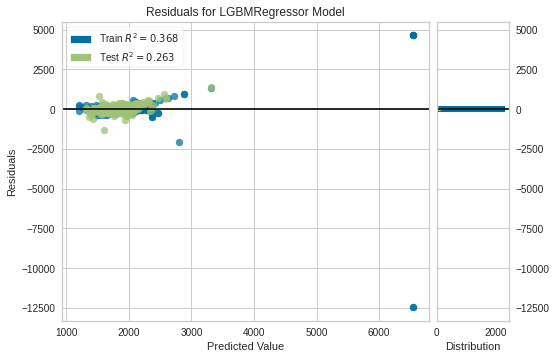

In [47]:
plot_model(tuned_lightgbm)

###Prediction Error Plot

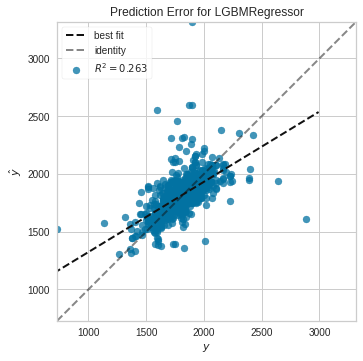

In [48]:
plot_model(tuned_lightgbm, plot = 'error')

###Feature Importance Plot

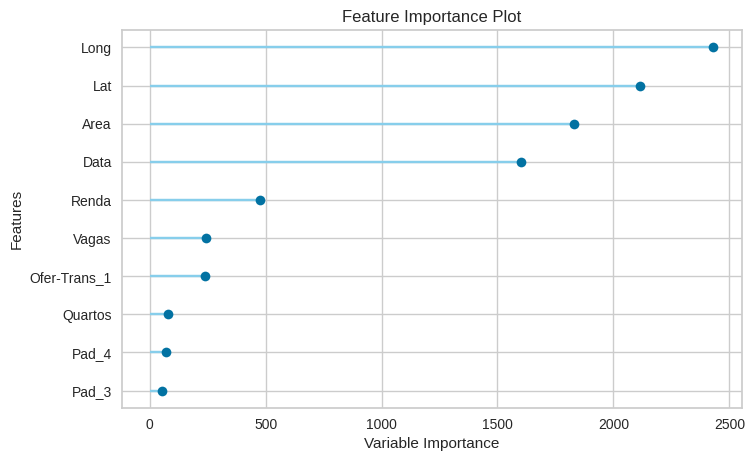

In [49]:
plot_model(tuned_lightgbm, plot='feature')

###Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [50]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##Predict on Test / Hold-out Sample

In [51]:
predict_model(tuned_lightgbm);

Model      MAE         MSE  ...      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  81.7579  19506.7992  ...  0.2626  0.0748  0.0459

[1 rows x 7 columns]

##Finalize Model for Deployment

In [52]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [53]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


##Predict on Unseen Dat

In [56]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

Lat       Long   Area  ...  Vagas  Valor-Unit        Label
0 -3.903083 -38.511129  89.00  ...    1.0     1797.75  1711.589845
1 -3.928723 -38.516542  82.64  ...    1.0     1875.61  1725.993099
2 -3.888250 -38.530555  79.76  ...    1.0     1880.64  1794.023364
3 -3.888222 -38.532889  84.00  ...    1.0     1904.76  1871.788868
4 -3.896147 -38.513334  83.85  ...    1.0     1908.17  1899.629198

[5 rows x 14 columns]

###R2 for Unseen Dat

In [58]:

from pycaret.utils import check_metric
check_metric(unseen_predictions.Valor-Unit, unseen_predictions.Label, 'R2')

AttributeError: ignored

##Saving the Model

In [ ]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

##Loading the Saved Model

In [ ]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


In [ ]:

new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [ ]:

new_prediction.head()

Carat Weight        Cut Color Clarity  ... Symmetry Report  Price         Label
0          1.53      Ideal     E     SI1  ...       ID   AGSL  12791  12262.949782
1          1.50       Fair     F     SI1  ...       VG    GIA  10450  10122.442382
2          1.01       Good     E     SI1  ...        G    GIA   5161   5032.520456
3          2.51  Very Good     G     VS2  ...       VG    GIA  34361  34840.379469
4          1.01       Good     I     SI1  ...       VG    GIA   4238   4142.695964

[5 rows x 9 columns]

In [ ]:

from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9779